In [1]:
#setup the environment
#
import sys
import numpy as np
import matplotlib.pyplot as plt
myModulePath = 'C:\\Users\\ricca\\.spyder-py3'
sys.path.append( myModulePath )
import hilbHuangEMD

In [2]:
#
# define the signal
#
acqFrq = 1e3
samplTime = 1.0/acqFrq
sigLen = 13000
xx = np.arange( 0, sigLen )
timeA = samplTime*xx
#
# linearly varying frequency
varLinA = 6 + 1.2 * timeA
#
SinA = np.sin( 2*np.pi*varLinA*timeA )
#

In [3]:
# now get the Hilbet Transform and the corresponding estimated phase
#
# the function returns also a 2nd phase, calculated limiting the minimum
# absolute values of the original signal to avoid division by zero
#
[ hlbTrsfSinA, hlbPhsSinA, hilbAltPhsA ] = hilbHuangEMD.hilbTransf( timeA, SinA, acqFrq )
#
# unwrap the phases  
linPhsSinA = hilbHuangEMD.phaseUnwrap( hlbPhsSinA )
linPhsAltA = hilbHuangEMD.phaseUnwrap( hilbAltPhsA )
#


C:\Users\ricca\.spyder-py3\hilbHuangEMD.py:191: RuntimeWarning: divide by zero encountered in true_divide
  hilbPhsOut = np.arctan( np.real( hilbSignOut ) / signalIn )


In [10]:
min( linPhsSinA ) + np.pi*0.5
#


0.0

Text(0.5, 1.0, 'Linear frequency sweep')

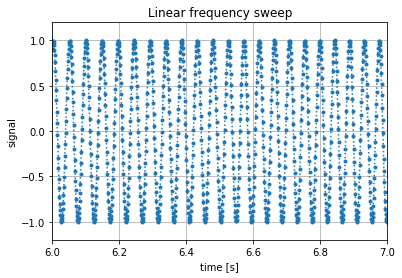

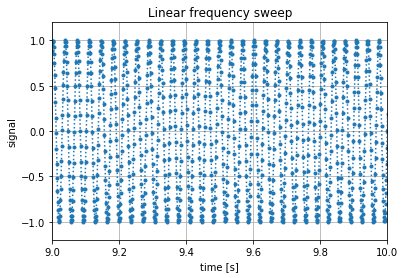

In [12]:
fig1 = plt.figure(1)
#
plt.plot( timeA, SinA, '.:', label='Frequency Sweep' )
plt.axis( [6, 7, -1.2, 1.2 ])
plt.grid()
plt.xlabel('time [s]')
plt.ylabel('signal')
plt.title('Linear frequency sweep')
#
fig2 = plt.figure(2)
plt.plot( timeA, SinA, '.:', label='Frequency Sweep' )
plt.axis( [9, 10, -1.2, 1.2 ])
plt.grid()
plt.xlabel('time [s]')
plt.ylabel('signal')
plt.title('Linear frequency sweep')


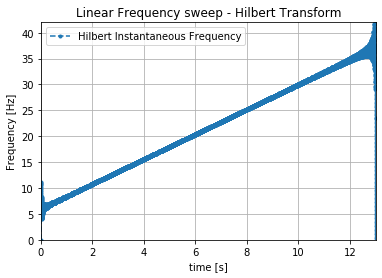

In [16]:
# instantaneaous frequency
instFrqSinA = hilbHuangEMD.hilbInstFrq( acqFrq, linPhsSinA )
instFrqAltA = hilbHuangEMD.hilbInstFrq( acqFrq, linPhsAltA )
#
# the linear relationship emerges when the estimated frequencies are plotted
# this is the derivative of the phase 
#
fig3 = plt.figure(3)
plt.plot( timeA, instFrqAltA, '.--', label='Hilbert Instantaneous Frequency' )
plt.grid()
plt.xlabel('time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Linear Frequency sweep - Hilbert Transform')
plt.axis([0, 13, 0, 42])
plt.legend()

In [17]:
# Assuming a sine-wave signal, a polynomial fit will recover the original 
# frequency sweep
#
from numpy.polynomial.polynomial import polyfit
#
# fit a 3rd order polynomial
# correct the  phase offset and rescale by 1/(2*pi)
[ coef, stats ] = polyfit( timeA, 0.5*( 0.5*np.pi+ linPhsSinA )/np.pi, 3, full=True )
[ coef1, stats1 ] = polyfit( timeA, 0.5*( 0.5*np.pi+ linPhsAltA )/np.pi, 3, full=True )
#

In [18]:
#
# the coefficient arrays return the original linear function
#
coef



array([ 2.38910502e-03,  5.99796444e+00,  1.20041453e+00, -2.31560607e-05])

In [19]:
#
# the coefficient arrays return the original linear function
#
coef1


array([ 2.38910502e-03,  5.99796444e+00,  1.20041453e+00, -2.31560607e-05])

In [ ]:
fig3 = plt.figure(3)
#
plt.plot( timeA, )